## Stein's Phenomenon

Stein (1956) found that if the dimension of data $p>=3$, then the MLE estimator $\hat{\mu_n}$ is inadmissible. This property is known as **_Stein's phenomenon_**.

We start with definition of inadmissible estimators.

&emsp;&emsp;**DEFINITION** (Inadmissible)

> An estimator $\hat{\mu_n}$ of the parameter $\mu$ is called **_inadmissible_** on $R^p$ with respect to the squared risk if there exists another estimator $\mu_n^*$ such that
$$E||\mu_n^*-\mu ||^2\leq E||\hat{\mu}_n-\mu||^2\quad\quad \textit{for all }\mu\in R^p,$$
and there exists $\mu_0\in R^p$ such that
$$E||\mu_n^*-\mu_0 ||^2 < E||\hat{\mu}_n-\mu_0||^2.$$

&emsp;&emsp;In this case, we also call that $\mu_n^*$ dominates $\hat{\mu}_n$ . Otherwise, the estimator $\hat{\mu_n}$ is called admissible. An estimator is admissible if it is not systematically outperformed, i.e. if there does not exist another estimator which displays less error for all the underlying unknown parameters.

According to the difinition, Stein's phenomenon can be desribed like:

&emsp;&emsp;For $p>=3$, there exists $\hat{\mu}$ such that $\forall\mu$,
$$E||\hat{\mu}_n-\mu ||^2 < E||\hat{\mu}^{MLE}_n-\mu_0||^2,$$
which makes MLE inadmissible.

A typical choice is the James-Stein estimator given by James-Stein (1961) for Gaussian distribution. To state formally,

&emsp;&emsp;**THEOREM**

> Suppose there is only one single observation $Y\thicksim N_p(\mu,I_p)$ (we want to estimate $\mu$). Then $\hat{\mu}^{MLE}=Y$. 
> Define
$$\hat{\mu}^{JS}_n=(1-\frac{(p-2)}{||Y||^2})Y,$$
> then
$$E_{\mu}||\hat{\mu}^{JS}-\mu||^2<E_{\mu}||Y-\mu||^2=E_{\mu}||\hat{\mu}^{MLE}-\mu||^2.$$

Here, we use Monte Carlo simulation to verify this.

For simplicity, we assume $\mu=e_1$, where $e_1$ is the basis vector in which only the first element is 1. Define the following function which takes dimension $p$ and number of simulation `nsim` as inputs to calculate the Monte Carlo simulation results of James Stein estimator.

In [2]:
import numpy as np

We need a sample generator, and risk calculators for both MLE and JS.

In [73]:
def sampleGenerator(p,nsim):
    mean=np.append(1.0,np.zeros((1,p-1)))
    cov=np.identity(p)
    sample=np.random.multivariate_normal(mean, cov, nsim)
    return sample
    
def MLE_Risk(p,sample):
    # mle risk
    mean=np.append(1.0,np.zeros((1,p-1)))
    mle_err=sample-mean
    risk_mle=np.linalg.norm(mle_err,axis=1)
    risk_mle=np.mean(risk_mle)
    # print 'Squared error loss for MLE:',risk_mle
    return risk_mle
    
def JS_Risk(p,sample):    
    # js risk
    mean=np.append(1.0,np.zeros((1,p-1)))
    shrnk_coef=1-(np.linalg.norm(sample,axis=1))**(-2)*(p-2)
    shrnk_coef=np.diag(shrnk_coef)
    js_est=np.mat(shrnk_coef)*np.mat(sample)
    js_err=js_est-mean
    risk_js=np.linalg.norm(js_err,axis=1)
    risk_js=np.mean(risk_js)
    # print 'Squared error loss for James-Stein estimator:',risk_js
    return risk_js

In [85]:
p,nsim=2,10
sample=sampleGenerator(p,nsim)
MLE_Risk(p,sample)
JS_Risk(p,sample)

1.4322062312180477

Now, we fix the number of simulation(e.g. `nsim=20`) and increase the dimension $p$ to compare the risks for MLE and JS.

[[ 0.          1.24417363  1.59263624  1.8507984   2.06720945  2.38123964
   2.56800242  2.78321012  2.85542063  3.09504756  3.24655018  3.3360053
   3.52322218  3.71175511  3.8445912   3.97473418  4.12491413  4.02929076
   4.27932602  4.42839279  4.63145495  4.55346915  4.8361789   4.74761532
   5.0100392   4.99544799  5.03381325  5.24160022  5.25921925  5.41363945]]
[[ 0.          1.24417363  1.31267434  1.33884704  1.38707147  1.50279261
   1.39432981  1.48313303  1.59128798  1.48701657  1.53265067  1.56584809
   1.46794728  1.47596399  1.53553864  1.5652597   1.56977283  1.5346284
   1.540338    1.47641266  1.53459501  1.46829193  1.5340931   1.62043251
   1.53732205  1.45410789  1.50576905  1.58603634  1.5181236   1.48780534]]


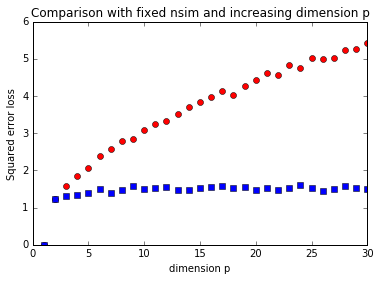

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
nsim=100
pmax=30
risk_mle=np.zeros([1, pmax])
risk_js=np.zeros([1, pmax])
for p in range(2,pmax+1,1):
    sample=sampleGenerator(p,nsim)
    risk_mle[0,p-1]=MLE_Risk(p,sample)
    risk_js[0,p-1]=JS_Risk(p,sample)
print risk_mle
print risk_js
plt.xlabel('dimension p')
plt.ylabel('Squared error loss')
plt.title('Comparison with fixed nsim and increasing dimension p')
x_axis=np.array(range(1,pmax+1,1)).reshape(1,pmax)
mle_plot=plt.plot(x_axis,risk_mle,'ro')
js_plot=plt.plot(x_axis,risk_js,'bs')
plt.show()